In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [18]:
# Importing unnormalized data from pre-processing

X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_stroke")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_stroke")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_stroke")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_stroke")
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,6065045116,7.660944,60.860335,0.137745,23.801921,0.273968,511.418765,0.045939,0.012137,8.007200,2.570145,0.000000
1,6071010020,9.200394,68.206665,0.228860,27.919917,0.358875,212.617647,0.064983,0.044896,0.123944,4.197502,0.000000
2,51013102702,8.795314,43.969795,1.038167,37.056995,0.547069,427.794151,0.247113,0.100311,0.135159,7.314805,0.003546
3,23031030300,6.117735,36.291889,0.160305,21.139852,0.256844,47.939003,0.164679,0.049373,0.078118,1.342834,0.000109
4,51570830300,8.228360,41.060503,0.293214,35.257927,0.446797,199.494336,0.125551,0.062721,0.269847,1.293875,0.000886


In [19]:
# Getting rid of extra column

X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract",inplace=True)

print(X_test.shape, X_train.shape)

(18081, 11) (54242, 11)


In [20]:
print(y_test.shape, y_train.shape)
y_test.head()

(18081, 2) (54242, 2)


,CensusTract,Stroke_prevalence
0,42043021904,2.8
1,6037481202,2.4
2,4013318800,1.4
3,25017342300,2.7
4,39099811700,3.2


In [21]:
# Putting y into correct shape for models

y_test.set_index("CensusTract", inplace=True)
y_train.set_index("CensusTract", inplace=True)
y_test = np.array(y_test)
y_train = np.array(y_train)
y_test = y_test.reshape(18081,)
y_train = y_train.reshape(54242,)

print(y_train.shape, y_test.shape)


(54242,) (18081,)


In [22]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
42043021904,9.481297,40.953682,0.724820,30.316690,0.413275,289.823396,0.091863,0.067407,0.866598,0.502358,0.022198
6037481202,11.963073,56.863046,0.557608,40.247379,0.597182,2084.649212,0.461403,0.241328,0.630706,8.139916,0.005080
4013318800,8.337011,55.138295,1.114741,45.444584,0.686757,266.625619,0.096556,0.231156,2.497551,7.682798,0.092214
25017342300,6.584386,39.033339,0.902960,29.735454,0.436747,627.426593,0.814000,0.092286,1.270315,15.026234,0.010393
39099811700,9.858903,43.280501,0.349336,24.904767,0.304716,680.088296,0.745854,0.044776,0.161224,0.758535,0.362000


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [23]:
# Instantiating RandomForestRegressor with default values
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred = rf.predict(X_test)

In [25]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5088971295068393
MAE: 0.5923674575521265
MSE: 0.7323520827387865
RMSE: 0.8557757198815508


In [7]:
# Instantiating RandomForestRegressor and randomly searching for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth" :range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [8]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [9]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=159)

In [11]:
y_pred = rs.predict(X_test)

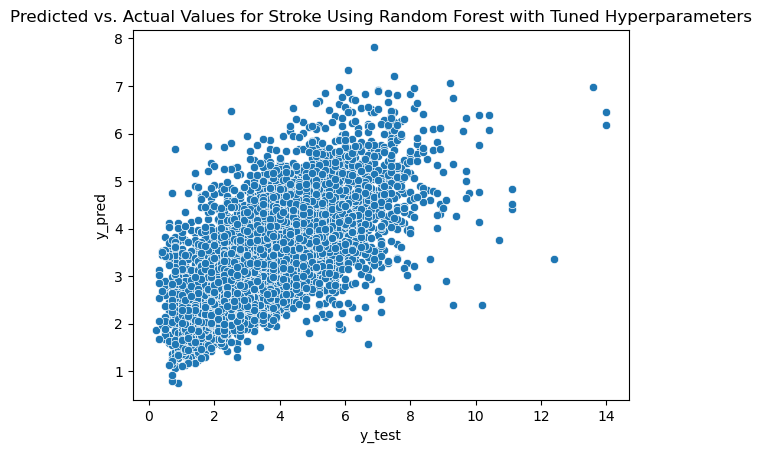

In [12]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Stroke Using Random Forest with Tuned Hyperparameters")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [13]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5074659823028738
MAE: 0.5930087033669572
MSE: 0.7344862662235571
RMSE: 0.8570217419783217


In [27]:
# Instantiating AdaBoostRegressor with default parameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [28]:
y_pred = ada.predict(X_test)

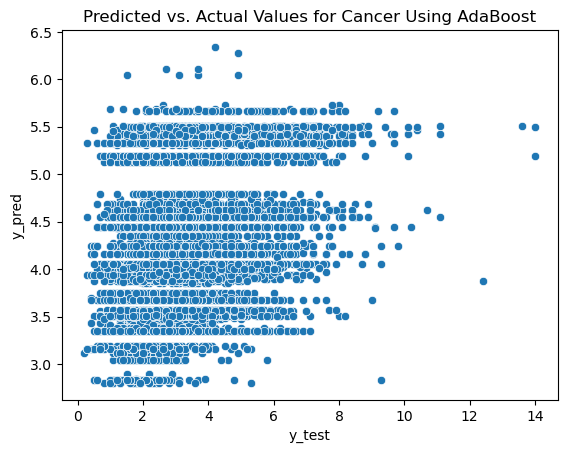

In [29]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [30]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.599383881653385
MAE: 1.2918216085010272
MSE: 2.3850646925591805
RMSE: 1.5443654659953971


Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [31]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [32]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x128a96280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1287e90d0>})

In [33]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=7.666027190016705, n_estimators=332)

In [35]:
y_pred = rs.predict(X_test)

In [36]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -201.83734812008353
MAE: 17.349001714506944
MSE: 302.47910016038935
RMSE: 17.391926292403305


Tuning the hyperparameter just made the model much worse. 

In [37]:
# Instantiating GradientBoostingRegressor using default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
y_pred = gb.predict(X_test)

In [39]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2800779790476645
MAE: 0.7292947166369735
MSE: 1.0735762772563588
RMSE: 1.0361352601163416


Now with randomly tuned hyperparameters.

In [40]:
# Instantiating GradientBoostingRegressor and randomly searching for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [41]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12c07e070>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [42]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.2037988789694174, max_leaf_nodes=10,
                          n_estimators=50)

In [44]:
y_pred = rs.predict(X_test)

In [45]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.28342070128031316
MAE: 0.7274687140818449
MSE: 1.068591477255823
RMSE: 1.0337269839062067


The tuning did not make much of a difference, and still not as good as Random Forest.

In [46]:
# Instantiating XGBRegressor with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
y_pred = xgb.predict(X_test)

In [48]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.41802924869366775
MAE: 0.6463762365140242
MSE: 0.8678578713748005
RMSE: 0.9315888961203866


This is still not as good as Random Forest, so I will do hyperparameter tuning on max_depth, min_child_weight, and gamma.

In [49]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.

xgb = XGBRegressor()
params = {"max_depth":range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [50]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c0ab160>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c0806d0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c0a7250>})

In [51]:
rs.best_params_

{'gamma': 1, 'max_depth': 117, 'min_child_weight': 195}

In [53]:
y_pred = rs.predict(X_test)

In [54]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.46514331327199077
MAE: 0.6273108348139133
MSE: 0.7975995092406598
RMSE: 0.8930842677153482


This is slightly better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. I will try LightGBM.

In [55]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_l

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [56]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12c078af0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12c0ab820>})

In [57]:
rs.best_estimator_

LGBMRegressor(reg_alpha=12.951305591821919, reg_lambda=3.5487756801904347)

In [59]:
y_pred = rs.predict(X_test)

In [60]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3984973663368794
MAE: 0.6612430982554034
MSE: 0.8969845891833093
RMSE: 0.9470927035846646


This is not as good as XGBoost

In [64]:
# Importing normalized data

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_stroke")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_stroke")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_stroke")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_stroke")
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,6065045116,7.660944,60.860335,-1.298195,-0.791714,-1.137889,0.374533,-1.153468,-1.198971,2.015009,2.570145
1,6071010020,9.200394,68.206665,-0.745985,-0.276352,-0.451110,-0.112745,-1.031186,-0.489208,-0.972549,4.197502
2,51013102702,8.795314,43.969795,1.483833,0.667457,0.816037,0.270521,-0.073208,0.358054,-0.924688,7.314805
3,23031030300,6.117735,36.291889,-1.150180,-1.166916,-1.286992,-0.812304,-0.464621,-0.406095,-1.181490,1.342834
4,51570830300,8.228360,41.060503,-0.419694,0.498842,0.179601,-0.145838,-0.673382,-0.175326,-0.432764,1.293875


In [65]:
# Getting rid of unneeded column

X_train_log.set_index("CensusTract", inplace=True)
X_test_log.set_index("CensusTract", inplace=True)
print(X_train_log.shape, X_test_log.shape, y_train_log.shape, y_test_log.shape)

(54242, 10) (18081, 10) (54242, 2) (18081, 2)


In [69]:
y_train_log.head()

,CensusTract,Stroke_prevalence
0,6065045116,3.7
1,6071010020,4.3
2,51013102702,1.3
3,23031030300,2.9
4,51570830300,3.1


In [70]:
# Getting rid of unneeded column

y_train_log.set_index("CensusTract", inplace=True)
y_test_log.set_index("CensusTract", inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [72]:
# Putting y into the correct shape for model

y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()

print(y_train.shape, y_test.shape)

(54242,) (18081,)


The next model I will try is a support vector machine regressor.

In [73]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.

svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [74]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12c0d40d0>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12893aac0>})

In [75]:
svm_rs.best_estimator_

SVR(C=6.12886457907847, epsilon=1.7904027696737428)

In [78]:
y_pred_log = svm_rs.predict(X_test_log)

In [79]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.08418087132046792
MAE: 1.0356698612202568
MSE: 1.616773525228569
RMSE: 1.2715240954180023


This model clearly does not work for this data.

## Random forest with default parameters gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.